In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from brokenaxes import brokenaxes

In [2]:
%store -r select_states_total_population_df 
%store -r select_states_total_avg_df

In [3]:
select_states_total_population_df

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019,POPESTIMATE2020
STNAME,,,,,,,,,,,
District of Columbia,605282,620290,635737,651559,663603,677014,687576,697079,704147,708253,712816
Illinois,12840545,12867783,12883029,12895778,12885092,12859585,12821709,12779893,12724685,12667017,12587530
Texas,25241897,25645504,26084120,26479646,26963092,27468531,27914064,28291024,28624564,28986794,29360759
Utah,2775413,2814797,2854146,2898773,2938327,2983626,3044241,3103540,3155153,3203383,3249879
West Virginia,1854265,1856606,1857446,1854768,1850569,1843332,1832435,1818683,1805953,1795263,1784787


In [4]:
select_states_total_avg_df

,2014,2015,2016,2017,2018,2019,2020,2021,2022
STNAME,,,,,,,,,
District of Columbia,X,X,X,X,X,X,X,X,X
Illinois,59900,64600,65700,60100,73400,69000,80700,98600,126300
Texas,61800,62400,66700,66700,75200,83300,88200,109600,124900
Utah,76300,80000,83000,76700,83800,70000,99200,134800,148500
West Virginia,66300,67500,70500,74100,74100,83600,86700,102900,138200


In [5]:
#reset population index to duplicate state and rename STNAME to State
select_states_total_population_df.reset_index()
select_states_total_population_df["States"] = select_states_total_population_df.index
select_states_total_population_df = select_states_total_population_df.rename(columns={"STNAME": "State",
                                                                               "POPESTIMATE2010": "2010",
                                                                               "POPESTIMATE2011": "2011",
                                                                               "POPESTIMATE2012": "2012",
                                                                               "POPESTIMATE2013": "2013",
                                                                               "POPESTIMATE2014": "2014",
                                                                               "POPESTIMATE2015": "2015",
                                                                               "POPESTIMATE2016": "2016",
                                                                               "POPESTIMATE2017": "2017",
                                                                               "POPESTIMATE2018": "2018",
                                                                               "POPESTIMATE2019": "2019",
                                                                               "POPESTIMATE2020": "2020"})


#reset price index to duplicate state and rename STNAME to State
select_states_total_avg_df.reset_index()
select_states_total_avg_df["States"] = select_states_total_avg_df.index
select_states_total_avg_df = select_states_total_avg_df.rename(columns={"STNAME": "State"})

In [6]:
select_states_total_avg_df

,2014,2015,2016,2017,2018,2019,2020,2021,2022,States
STNAME,,,,,,,,,,
District of Columbia,X,X,X,X,X,X,X,X,X,District of Columbia
Illinois,59900,64600,65700,60100,73400,69000,80700,98600,126300,Illinois
Texas,61800,62400,66700,66700,75200,83300,88200,109600,124900,Texas
Utah,76300,80000,83000,76700,83800,70000,99200,134800,148500,Utah
West Virginia,66300,67500,70500,74100,74100,83600,86700,102900,138200,West Virginia


In [7]:
select_states_total_population_df.columns

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', 'States'],
      dtype='object')

In [8]:
#make key for graphs
avg_pop = select_states_total_population_df[[str(year) for year in range(2010, 2021)]]

pop_years = avg_pop.keys()

In [9]:
pop_years

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020'],
      dtype='object')

In [10]:
#turn years into column heads
select_states_total_avg_df = select_states_total_avg_df.rename(columns={year: str(year) for year in range(2014, 2023)})
select_states_total_avg_df.columns

Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'States'],
      dtype='object')

In [11]:
#make key for graphs
avg_price = select_states_total_avg_df[[str(year) for year in range(2014, 2023)]]

price_years = avg_price.keys()

In [12]:
price_years

Index(['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='object')

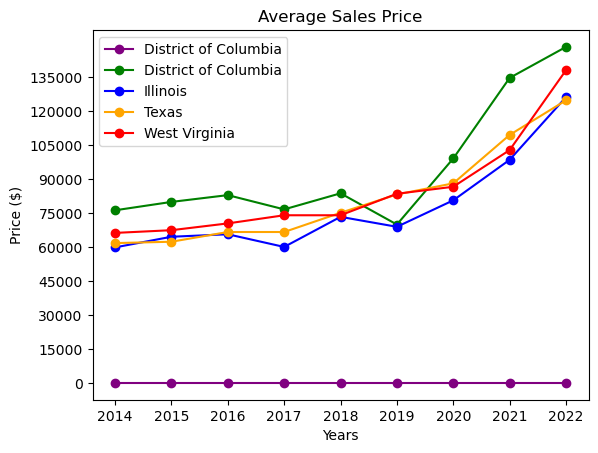

In [13]:
#Plot DC Annual Avg Price
dc_avg, = plt.plot(price_years, select_states_total_avg_df.loc['District of Columbia',["2014","2015","2016","2017","2018",
                                                                                "2019","2020","2021","2022"]], marker="o", 
                        color="purple",label=select_states_total_avg_df.loc['District of Columbia',"States"])

#Plot Utah Annual Avg Price
ut_avg, = plt.plot(price_years, select_states_total_avg_df.loc['Utah',["2014","2015","2016","2017","2018",
                                                                                "2019","2020","2021","2022"]], marker="o", 
                        color="green",label=select_states_total_avg_df.loc['District of Columbia',"States"])

#Plot Illinois Annual Avg Price
il_avg, = plt.plot(price_years, select_states_total_avg_df.loc['Illinois',["2014","2015","2016","2017","2018",
                                                                                "2019","2020","2021","2022"]], marker="o", 
                        color="blue",label=select_states_total_avg_df.loc['Illinois',"States"])

#Plot Texas Annual Avg Price
tx_avg, = plt.plot(price_years, select_states_total_avg_df.loc['Texas',["2014","2015","2016","2017","2018",
                                                                                "2019","2020","2021","2022"]], marker="o", 
                        color="orange",label=select_states_total_avg_df.loc['Texas',"States"])

#Plot West Virginia Annual Avg Price
va_avg, = plt.plot(price_years, select_states_total_avg_df.loc['West Virginia',["2014","2015","2016","2017","2018",
                                                                                "2019","2020","2021","2022"]], marker="o",
                        color="red",label=select_states_total_avg_df.loc['West Virginia',"States"])

#make graph legable
plt.yticks(ticks=range(0, 150000, 15000), labels=range(0, 150000, 15000))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title("Average Sales Price")
plt.ylabel("Price ($)")
plt.xlabel("Years")
plt.legend(handles=[dc_avg, ut_avg, il_avg, tx_avg, va_avg])
plt.savefig('sales_price_change_graph.jpg', format='jpg')
plt.show()

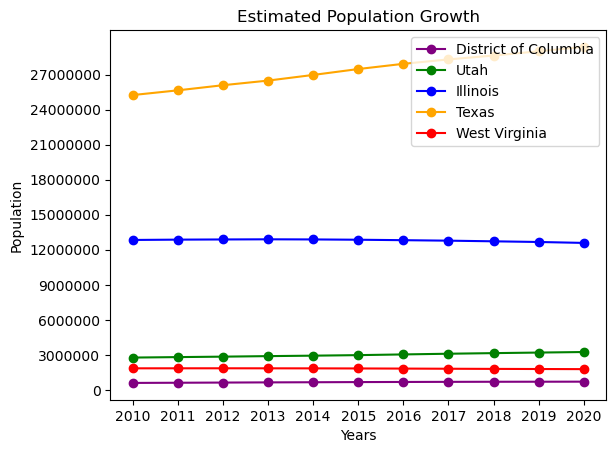

In [14]:
#Plot DC Pop Estimate
dc_pop, = plt.plot(pop_years, select_states_total_population_df.loc['District of Columbia',["2010","2011","2012","2013",
                                                                                            "2014","2015","2016","2017",
                                                                                            "2018","2019","2020"]], marker="o", 
                        color="purple",label=select_states_total_population_df.loc['District of Columbia',"States"])

#Plot Utah Pop Estimate
ut_pop, = plt.plot(pop_years, select_states_total_population_df.loc['Utah',["2010","2011","2012","2013",
                                                                                            "2014","2015","2016","2017",
                                                                                            "2018","2019","2020"]], marker="o", 
                        color="green",label=select_states_total_population_df.loc['Utah',"States"])

#Plot Illinois Pop Estimate
il_pop, = plt.plot(pop_years, select_states_total_population_df.loc['Illinois',["2010","2011","2012","2013",
                                                                                            "2014","2015","2016","2017",
                                                                                            "2018","2019","2020"]], marker="o", 
                        color="blue",label=select_states_total_population_df.loc['Illinois',"States"])

#Plot Texas Pop Estimate
tx_pop, = plt.plot(pop_years, select_states_total_population_df.loc['Texas',["2010","2011","2012","2013",
                                                                                            "2014","2015","2016","2017",
                                                                                            "2018","2019","2020"]], marker="o", 
                        color="orange",label=select_states_total_population_df.loc['Texas',"States"])

#Plot West Virginia Pop Estimate
va_pop, = plt.plot(pop_years, select_states_total_population_df.loc['West Virginia',["2010","2011","2012","2013",
                                                                                            "2014","2015","2016","2017",
                                                                                            "2018","2019","2020"]], marker="o", 
                        color="red",label=select_states_total_population_df.loc['West Virginia',"States"])

#make graoh legible
plt.yticks(ticks=range(0, 30000000, 3000000), labels=range(0, 30000000, 3000000))
plt.tick_params(axis='both', which='major', labelsize=10)
plt.title("Estimated Population Growth")
plt.ylabel("Population")
plt.xlabel("Years")
plt.legend(handles=[dc_pop, ut_pop, il_pop, tx_pop, va_pop])
plt.savefig('pop_growth_per_state.jpg', format='jpg')
plt.show()